# 🐍 Bangladeshi Snake Recognizer  

| No. | English Name            | বাংলা নাম          | Type            |
|-----|-------------------------|-------------------|-----------------|
| 1   | Spectacled Cobra        | গোখরা             | Venomous        |
| 2   | Monocled Cobra          | চশমা গোখরা        | Venomous        |
| 3   | King Cobra              | রাজ গোখরা         | Venomous        |
| 4   | Common Krait            | কালাই সাপ         | Venomous        |
| 5   | Banded Krait            | ব্যান্ডেড ক্রাইট  | Venomous        |
| 6   | Russell's Viper         | চন্দ্রবোড়া        | Venomous        |
| 7   | Saw-scaled Viper        | একিস ভাইপার      | Venomous        |
| 8   | Green Pit Viper         | সবুজ পিট ভাইপার   | Venomous        |
| 9   | Beaked Sea Snake        | সমুদ্র সাপ        | Venomous        |
| 10  | Yellow-lipped Sea Krait | সমুদ্র ক্রাইট     | Venomous        |
| 11  | Indian Rock Python      | আজগর              | Non-Venomous    |
| 12  | Rat Snake               | দাড়াশ             | Non-Venomous    |
| 13  | Checkered Keelback      | ধামন              | Non-Venomous    |
| 14  | Common Wolf Snake       | নেকড়ে সাপ         | Non-Venomous    |
| 15  | Green Trinket Snake     | সবুজ সাপ          | Non-Venomous    |
| 16  | Bronzeback Tree Snake   | গাছে ওঠা সাপ     | Non-Venomous    |
| 17  | Common Kukri Snake      | কুক্রি সাপ        | Non-Venomous    |




#Training 2nd model "efficientnet_b0"  model



In [ ]:
%matplotlib inline

In [ ]:
!pip install -Uqq fastai

In [ ]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Bangladeshi_snake_recognizer

/content/drive/My Drive/Bangladeshi_snake_recognizer


In [ ]:
# path to your 'data' folder
path = Path('/content/drive/My Drive/Bangladeshi_snake_recognizer/data')

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    item_tfms=Resize(460),                 # make all images uniform size
    batch_tfms=aug_transforms(size=224)    # apply random crops, flips, zooms
)
dls = dblock.dataloaders(path, bs=32)


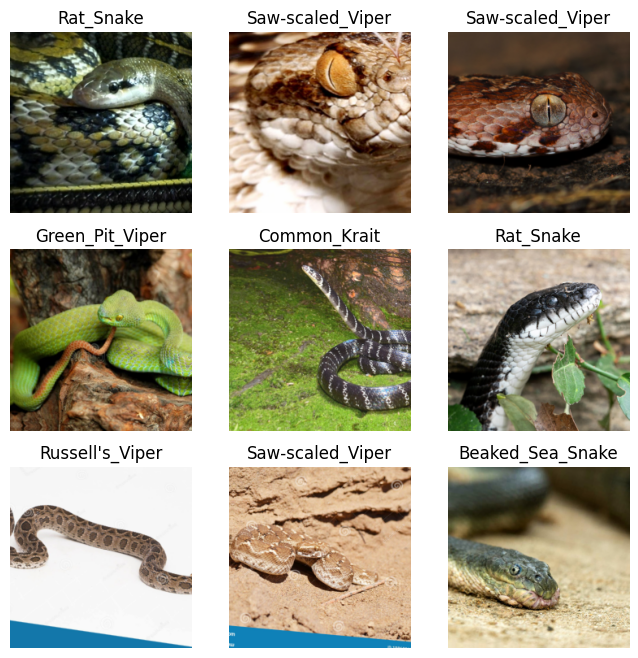

In [ ]:
dls.show_batch(max_n=9, figsize=(8,8))

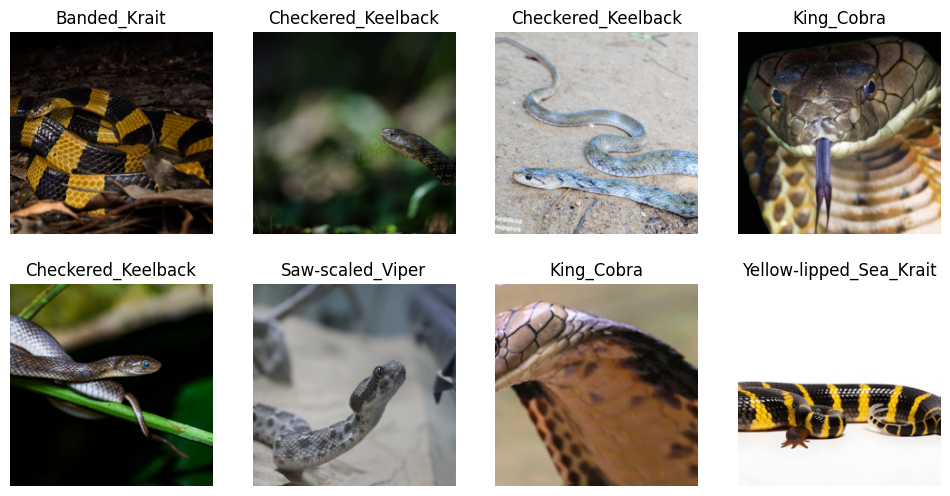

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

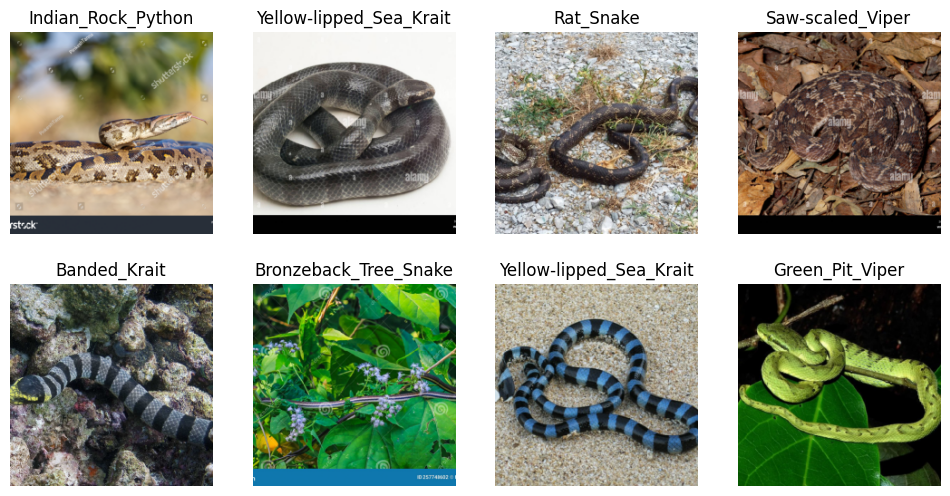

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

In [ ]:
torch.save(dls, "snake_dataloader_v2.pkl")

##Fetech the data

In [ ]:
dls = torch.load(f"snake_dataloader_v2.pkl", weights_only=False)


"""
a recent change in PyTorch 2.6:

By default, torch.load now uses weights_only=True.

But your .pkl file (snake_dataloader_vX.pkl) contains a Fastai DataLoaders object, not just weights.
"""

'\na recent change in PyTorch 2.6:\n\nBy default, torch.load now uses weights_only=True.\n\nBut your .pkl file (snake_dataloader_vX.pkl) contains a Fastai DataLoaders object, not just weights.\n'

In [ ]:
model_path = "models"

In [ ]:
model = vision_learner(dls, efficientnet_b0, metrics=[error_rate,accuracy])

SuggestedLRs(valley=0.0012022644514217973)

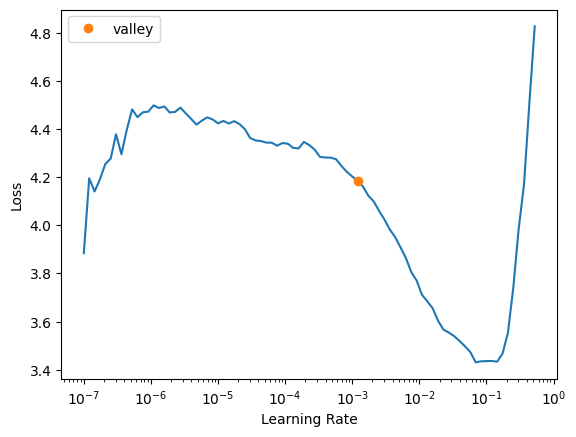

In [ ]:
# 4️⃣ Find learning rate
model.lr_find()


In [ ]:
# 5️⃣ Train model
model.fine_tune(10, base_lr=3e-3)  # 5 epochs (you can increase if dataset is big)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.283749,1.424664,0.392683,0.607317,01:56


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.507761,1.070038,0.312195,0.687805,01:55
1,1.342595,1.079083,0.312195,0.687805,01:56
2,1.216305,1.004192,0.297561,0.702439,01:56
3,1.116513,0.907102,0.273171,0.726829,01:55
4,0.971512,0.926198,0.280488,0.719512,01:56
5,0.847028,0.866635,0.265854,0.734146,01:55
6,0.724098,0.812912,0.243902,0.756098,01:57
7,0.634878,0.812631,0.241463,0.758537,01:55
8,0.611394,0.803915,0.253659,0.746341,01:56
9,0.558369,0.802791,0.239024,0.760976,01:54


In [ ]:
model.export("bangladeshi-snake-recognizer-v2.pkl")